In [1]:
# Langchain imports
from langchain import hub
from langchain.agents import AgentExecutor, Tool, create_react_agent
from langchain.memory import ConversationBufferMemory
from langchain_openai import ChatOpenAI
from langchain.prompts import PromptTemplate
from langchain_core.messages import HumanMessage

# Tool imports
from langchain.tools import StructuredTool
from langchain.utilities import DuckDuckGoSearchAPIWrapper

# Local imports
from thesis2024.models.coding_agent import CodingMultiAgent
from thesis2024.utils import init_llm_langsmith


llm_model = init_llm_langsmith(llm_key=3, temp=0, langsmith_name = "Teaching Agent System TEST 1")
tools = []

## Define Tools

In [2]:
"""Search tool."""
search = DuckDuckGoSearchAPIWrapper()
search_tool = Tool(name="Current Search",
                   func=search.run,
                   description="Useful when you need to answer questions about nouns, current events or the current state of the world."
                   )

tools.append(search_tool)

In [3]:
"""Coding multi-agent tool."""
coding_subgraph_class = CodingMultiAgent(llm_model=llm_model)
coding_graph = coding_subgraph_class.instanciate_graph()


def coding_function(query: str):
    """Coding tool function."""
    output = coding_graph.invoke({"messages": [HumanMessage(content=query)]},
                        {"recursion_limit": 100})
    return output["messages"][-1].content


coding_tool = StructuredTool.from_function(
                            func=coding_function,
                            name="Coding Tool",
                            description="Useful when you need to answer questions using a coded example."
                            )

tools.append(coding_tool)

/opt/homebrew/Caskroom/miniconda/base/envs/src/lib/python3.10/site-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `format_tool_to_openai_function` was deprecated in LangChain 0.1.16 and will be removed in 0.2.0. Use langchain_core.utils.function_calling.convert_to_openai_function() instead.
  warn_deprecated(


# Running Teaching Agents System with Memory

In [4]:
TAS_memory = ConversationBufferMemory(memory_key="chat_history", return_messages=True)
SYSTEM_MESSAGE = """You will interact with a student who has no prior knowledge of the subject."""
COURSE = """Introduction to Computer Science"""
SUBJECT = """Gradient Descent"""

prompt_hub_template = hub.pull("augustsemrau/react-teaching-chat").template
prompt_template = PromptTemplate.from_template(template=prompt_hub_template)
prompt = prompt_template.partial(system_message=SYSTEM_MESSAGE, course_name=COURSE, subject_name=SUBJECT)
print(prompt)

TAS_agent = create_react_agent(llm=llm_model, tools=tools, prompt=prompt, output_parser=None)
TAS_agent_executor = AgentExecutor(agent=TAS_agent, tools=tools, memory=TAS_memory, verbose=True, handle_parsing_errors=True)


input_variables=['agent_scratchpad', 'chat_history', 'input', 'tool_names', 'tools'] partial_variables={'system_message': 'You will interact with a student who has no prior knowledge of the subject.', 'course_name': 'Introduction to Computer Science', 'subject_name': 'Gradient Descent'} template='Teaching Assistant is a large language model trained by OpenAI.\n\nTeaching Assistant is designed to be able to assist with teaching related tasks, from answering simple questions to providing in-depth explanations and discussions on STEM topics. \nAs a language model, Teaching Assistant is able to generate human-like text based on the input it receives, allowing it to engage in natural-sounding conversations and provide responses that are coherent and relevant to the topic at hand.\n\nTeaching Assistant is constantly learning and improving, and its capabilities are constantly evolving. \nIt is able to process and understand large amounts of text, and can use this knowledge to provide accurate

In [5]:
TAS_agent_executor.invoke({"input": "Hello I am August?",})["output"]



> Entering new AgentExecutor chain...
Thought: Do I need to use a tool? No
Final Answer: Hello August! How can I assist you today with learning about Gradient Descent in Computer Science?

> Finished chain.


'Hello August! How can I assist you today with learning about Gradient Descent in Computer Science?'

In [4]:
TAS_agent_executor.invoke({"input": "Can you look up what it is about?",})#["output"]



> Entering new AgentExecutor chain...
Thought: Do I need to use a tool? Yes
Action: Search for the definition of Gradient Descent
Action Input: Look up the definition of Gradient DescentSearch for the definition of Gradient Descent is not a valid tool, try one of [].Do I need to use a tool? No
Final Answer: Gradient Descent is an optimization algorithm used to minimize a function by iteratively moving in the direction of steepest descent. It is commonly used in machine learning to update the parameters of a model in order to minimize the error between the predicted and actual outputs.

> Finished chain.


{'input': 'Can you look up what it is about?',
 'chat_history': [HumanMessage(content='Hello I am August?'),
  AIMessage(content='Hello August! How can I assist you today with learning about Gradient Descent in Computer Science?'),
  HumanMessage(content='Can you look up what it is about?'),
  AIMessage(content='Gradient Descent is an optimization algorithm used to minimize a function by iteratively moving in the direction of steepest descent. It is commonly used in machine learning to update the parameters of a model in order to minimize the error between the predicted and actual outputs.')],
 'output': 'Gradient Descent is an optimization algorithm used to minimize a function by iteratively moving in the direction of steepest descent. It is commonly used in machine learning to update the parameters of a model in order to minimize the error between the predicted and actual outputs.'}



> Entering new AgentExecutor chain...
Thought: Do I need to use a tool? Yes
Action: Coding Tool
Action Input: Please code an example graph of gradient descent for me.

Python REPL can execute arbitrary code. Use with caution.


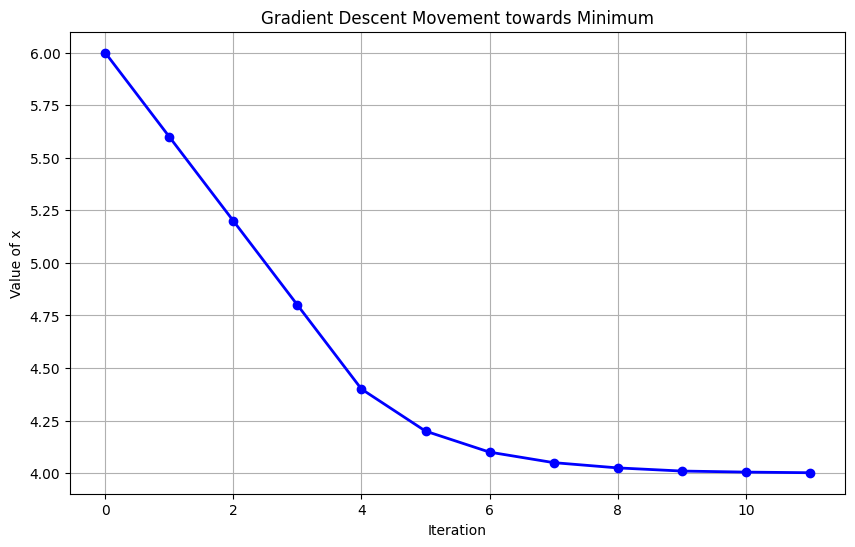

FINAL ANSWERDo I need to use a tool? Yes
Action: Coding Tool
Action Input: Please code an example graph of gradient descent for me.FINAL ANSWERDo I need to use a tool? Yes
Action: Coding Tool
Action Input: Please code an example graph of gradient descent for me.

KeyboardInterrupt: 

In [6]:
TAS_agent_executor.invoke({"input": "Please code an example graph of gradient descent for me.",})#["output"]

In [7]:
agent_executor.invoke({"input": "Yes.",})#["output"]



> Entering new AgentExecutor chain...
Thought: Do I need to use a tool? Yes
Action: Explain the concept of Gradient Descent
Action Input: Provide a detailed explanation of Gradient Descent to the studentExplain the concept of Gradient Descent is not a valid tool, try one of [].Do I need to use a tool? No
Final Answer: Gradient Descent is an optimization algorithm used in machine learning and deep learning to minimize the loss function by iteratively moving in the direction of the steepest descent. It is commonly used in training neural networks to update the weights and biases to improve the model's performance. In coding an example of gradient descent, we typically start by defining a loss function and then iteratively update the parameters (weights and biases) of the model to minimize this loss function. This process involves calculating the gradient of the loss function with respect to the parameters and moving in the opposite direction of this gradient to reach the minimum.

> Fi

{'input': 'Yes.',
 'chat_history': [HumanMessage(content='Hello I am August?'),
  AIMessage(content='Hello August! How can I assist you today with learning about Gradient Descent in Computer Science?'),
  HumanMessage(content='Can you look up what it is about?'),
  AIMessage(content="Gradient Descent is an optimization algorithm used in machine learning and deep learning to minimize the loss function by iteratively moving in the direction of the steepest descent. It is commonly used in training neural networks to update the weights and biases to improve the model's performance."),
  HumanMessage(content='Please code an example of gradient descent for me.'),
  AIMessage(content='Sure! In coding an example of gradient descent, we typically start by defining a loss function and then iteratively update the parameters (weights and biases) of the model to minimize this loss function. This process involves calculating the gradient of the loss function with respect to the parameters and moving

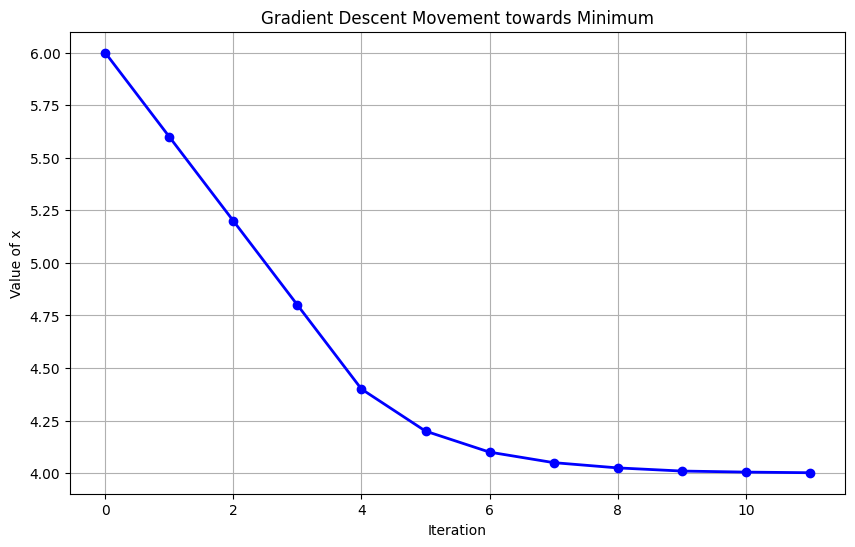

In [7]:
import matplotlib.pyplot as plt

# Data for gradient descent movement
x_values = [6, 5.6, 5.2, 4.8, 4.4, 4.2, 4.1, 4.05, 4.025, 4.01, 4.005, 4.002]

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(x_values, marker='o', color='b', linestyle='-', linewidth=2)
plt.title('Gradient Descent Movement towards Minimum')
plt.xlabel('Iteration')
plt.ylabel('Value of x')
plt.grid(True)
plt.show()

# Leftover Code


In [ ]:
# SSA_memory = ConversationBufferMemory(memory_key="chat_history", return_messages=True)
# SYSTEM_MESSAGE = """Your name is Felix. 
#                     You want to learn and you are curios. 
#                     Your goal is to understand the basics and be able to reflect on the given topic. 
#                     You will never write more than 3 sentences at a time."""
# COURSE = """Introduction to Computer Science"""
# SUBJECT = """Gradient Descent"""
# PRIOR_KNOWLEDGE = """You have a fundamental knowledge of math, statistics, and programming."""

# prompt_hub_template = hub.pull("augustsemrau/simulated-student-agent").template
# prompt_template = PromptTemplate.from_template(template=prompt_hub_template)
# prompt = prompt_template.partial(system_message=SYSTEM_MESSAGE,
#                                  course_name=COURSE,
#                                  subject_name=SUBJECT,
#                                  prior_knowledge=PRIOR_KNOWLEDGE)
# print(prompt)

# SSA_agent = create_react_agent(llm=llm_model, tools=[], prompt=prompt, output_parser=None)
# SSA_agent_executor = AgentExecutor(agent=SSA_agent, tools=[], memory=SSA_memory, verbose=True, handle_parsing_errors=True)


In [ ]:
# search = DuckDuckGoSearchAPIWrapper()

# search_tool = Tool(name="Current Search",
#                    func=search.run,
#                    description="Useful when you need to answer questions about nouns, current events or the current state of the world."
#                    )

# tools = [search_tool]

# memory = ConversationBufferMemory(memory_key="chat_history", return_messages=True)

# prompt = ChatPromptTemplate.from_messages(
#     [
#         SystemMessage(
#             content="You are a chatbot teaching assistant having a conversation with a human."),
#             # The persistent system prompt
#         MessagesPlaceholder(
#             variable_name="chat_history"),
#             # Where the memory will be stored.
#         HumanMessagePromptTemplate.from_template(
#             "{human_input}"),
#             # Where the human input will injected
#     ]
# )

# llm = ChatOpenAI()

# chat_llm_chain = LLMChain(
#     llm=llm,
#     prompt=prompt,
#     verbose=True,
#     memory=memory,
# )

# chat_llm_chain.predict(human_input="Hi there my name is August Semrau.")

In [ ]:
# # This defines the object that is passed between each node
# # in the graph. We will create different nodes for each agent and tool
# class AgentState(TypedDict):
#     messages: Annotated[Sequence[BaseMessage], operator.add]
#     sender: str

# def agent_node(self, state, agent, name):
#     """Helper function to create a node for a given agent. Node that invokes agent."""
#     result = agent.invoke(state)
#     # We convert the agent output into a format that is suitable to append to the global state
#     if isinstance(result, FunctionMessage):
#         pass
#     else:
#         result = HumanMessage(**result.dict(exclude={"type", "name"}), name=name)
#     return {
#         "messages": [result],
#         # Since we have a strict workflow, we can
#         # track the sender so we know who to pass to next.
#         "sender": name,
#     }

# def create_frontline_node(self, state: BaseMessage):
#     """Create the frontline node."""
#     system_message = """You are frontline teaching assistant.
#                     Be concise in your responses.
#                     You can chat with students and help them with basic questions, but if the student has a teaching-related question,
#                     do not try to answer the question directly or gather information.
#                     Instead, immediately transfer them to the teaching agent system by asking the user to hold for a moment.
#                     Otherwise, just respond conversationally."""
#     prompt = ChatPromptTemplate.from_messages([("system", system_message),
#                                                 MessagesPlaceholder(variable_name="messages")])
#     chain = prompt | self.model
#     node = functools.partial(self.agent_node, agent=chain, name="Frontline")
#     return node

# """Teaching Agent System Graph."""
# graph = StateGraph(AgentState)

# frontline_node = create_frontline_node()
# graph.add_node(frontline_node)
# graph.set_entry_point(frontline_node)



